## EDA To Prediction(DieTanic)
- 필사 출처: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

- part1: Exploratory Data Analysis(EDA)
  - analysis of the features
  - finding any relations or trends considering multiple features
- part2: Feature Engineering and Data Cleaning
  - ***adding any few features***
  - removing redundant features
  - converting features into suitable form for modeling
- part3: Predictive Modeling 
  - running basic algorithms
  - cross validation
  - ensembling
  - ***important features extraction***

### Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age, Cabin and Embarked have null values. I will try to fix them

- **How many Survived?**

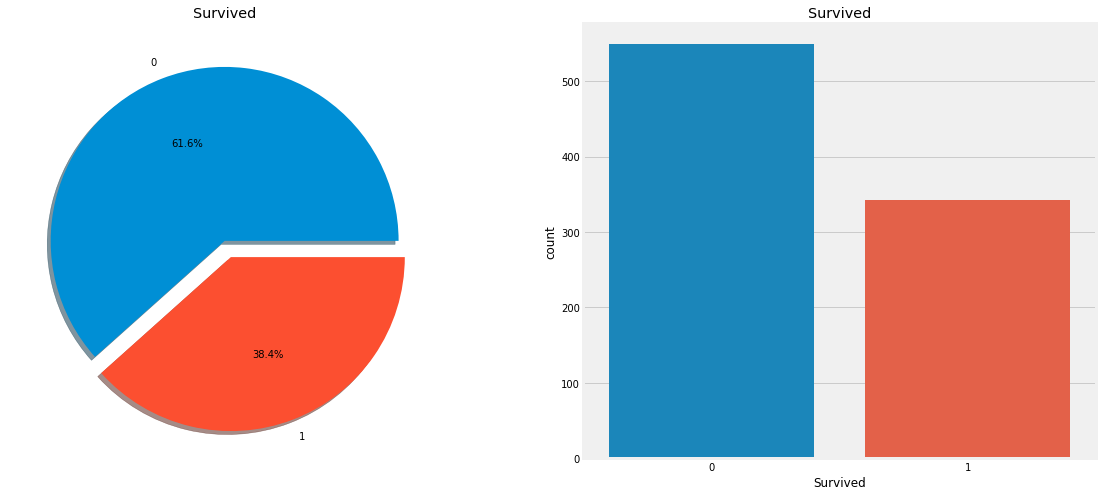

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- It is evident that not many passengers survived the accident
- Out of 891 passengers in training set, only around 350 survived i.e. Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't
- We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port of Embarcation, Age, etc.
- First let us Understand the different types of features.

#### Types of Feaures
- Categorical Features:
  - A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.
  - For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also know as Nominal Variables.
  - categorical features in the dataset: Sex, Embarked

- Ordinal Feautres:
  - an ordinal variable is similar to categorical values, but the difference between them is that we can have ralative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable
  - Ordinal features in the dataset: PClass

- Continuous Feature:
  - a feature is said to be continous if it can take values between any two points or between the minimum or maximum vlues in the features column.
  - Continous Features in the dataset: Age

#### Analysing The Features
- **Sex -> Categorical Feature**

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

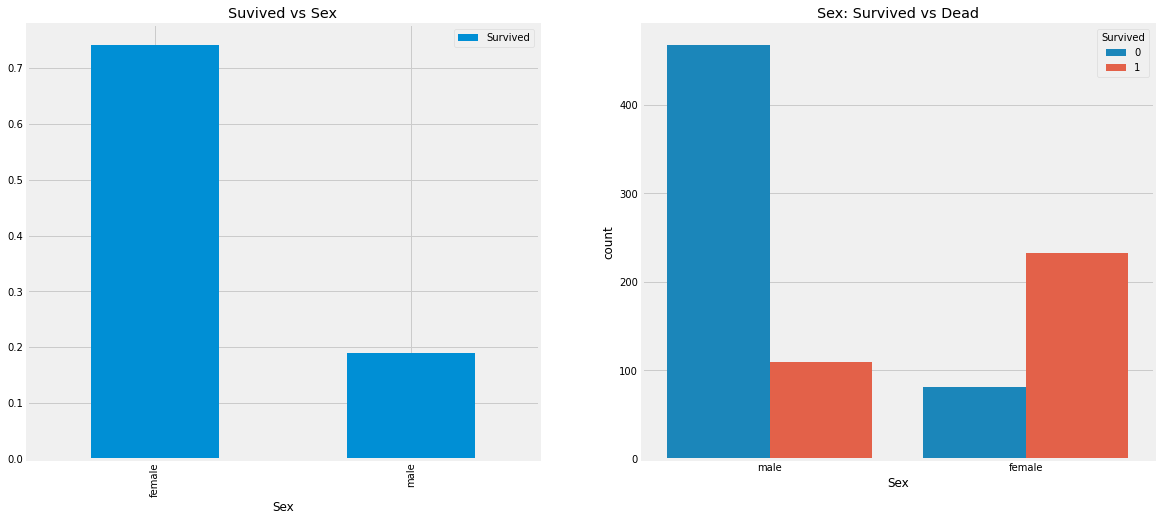

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Suvived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males survived. The survival rates for a women on the ship is around 75% while tha for men in around 18~19%.
- This looks to be a very important feature for modeling. But is it the best? Let's check other features.

- **PClass -> Ordinal Feature**

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


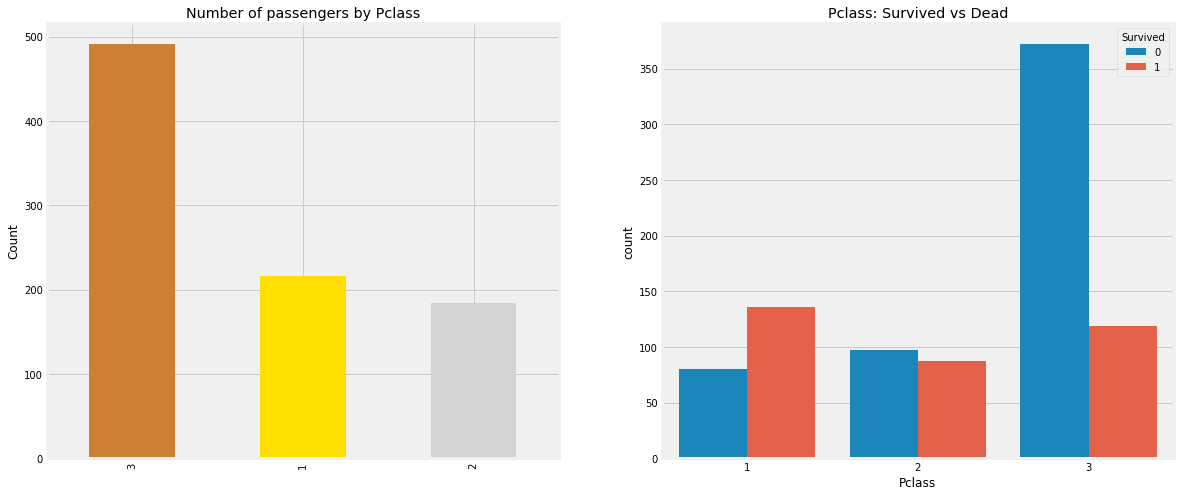

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- People say Money Can't buy everthing. But we can clearly see that passengers of Pclass 1 were given a very high priority while rescue. Even though the the number of passengers in Pclass 3 were lot higher, still the number of survival from them is very low, somewhere around 25%.
- For Pclass 1 %surrived is around 63% while for Pclass2 is around 48%. So money and status matters.
- Let's Dive in a little bit more and check for other interesitng observations. Let's check survival rate with **Sex and Pclass together**.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

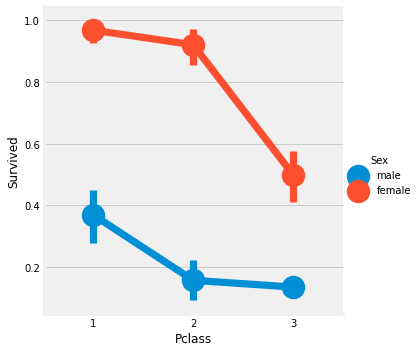

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

- we use factorplot in this case, because they make the seperation of categorical values easy.
- looking at the crosstab and the facotrplot, we can easily infer that surival for Women from Pclass 1 is about 95~96%, as only 3 out of 94 Women from Pclass 1 died.
- it is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.
- Looks like Pclass is also an important feature. Let's analyse other features.

- **Age -> Continuous Feature**

In [12]:
print('The oldest Passengers was of: ', data['Age'].max(),'Years')
print('The youngest Passengers was of: ', data['Age'].min(),'Years')
print('The average Age on the ship: ', data['Age'].mean(),'Years')

The oldest Passengers was of:  80.0 Years
The youngest Passengers was of:  0.42 Years
The average Age on the ship:  29.69911764705882 Years


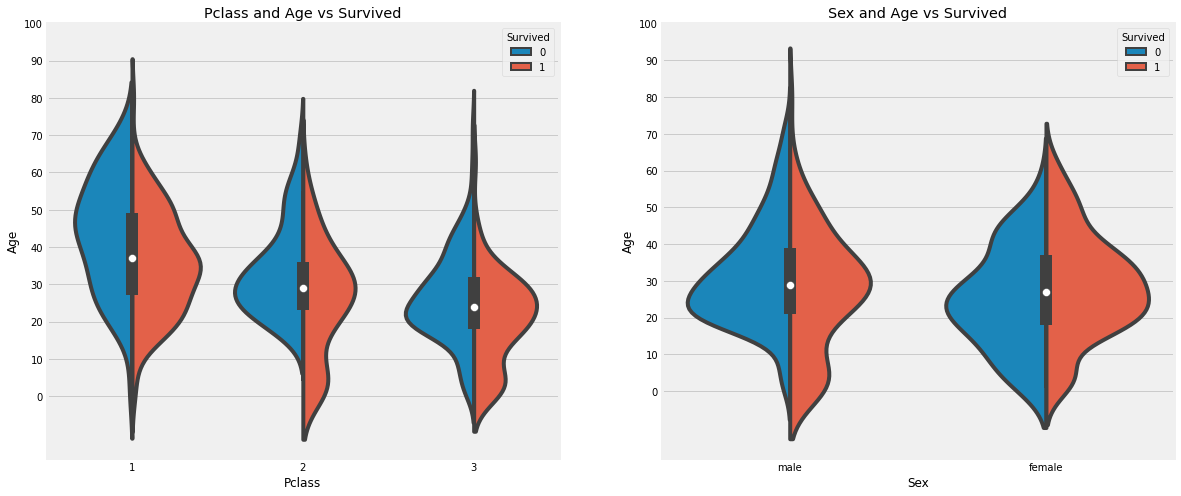

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass',"Age",hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

- the number of children increases with Pclass and the survival rate for passengers below Age 10(i.e. children) looks to be good irrespective of the Pclass
- ***Survival chances for passengers aged 20-50 from Pclass 1 is high and is even better for women.***
***- for males, the survival chances decreases with and increase in age.***

- As we had seen earlier, the Age feature has 177 null values. To replace these Nan values, we can assign them the mean age of the dataset.
- But the problem is, there were many people with many different ages. We just cannot assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie?
- we can check the Name feature! looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the repective groups.

**- What's in a name? -> Feature**

In [14]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # extract the salutations
                                                           # it looks for strings which lie between A-Z or a-z and followed by a .(dot)
                                                           # so we can successfully extract the initials from the name

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') #check the initails with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
# there are some misspelled initials like Mile Mme that stand for Miss. we have to replace them with Miss and same thig for other values
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #check the average age by initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**- Filling NaN ages**    
***- master가 5세? -> 진정한 의미의 평균은 아니지 않나***

In [18]:
# assigning the Nan values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = 46

In [19]:
data.Age.isnull().any() # so no null values left finally

False

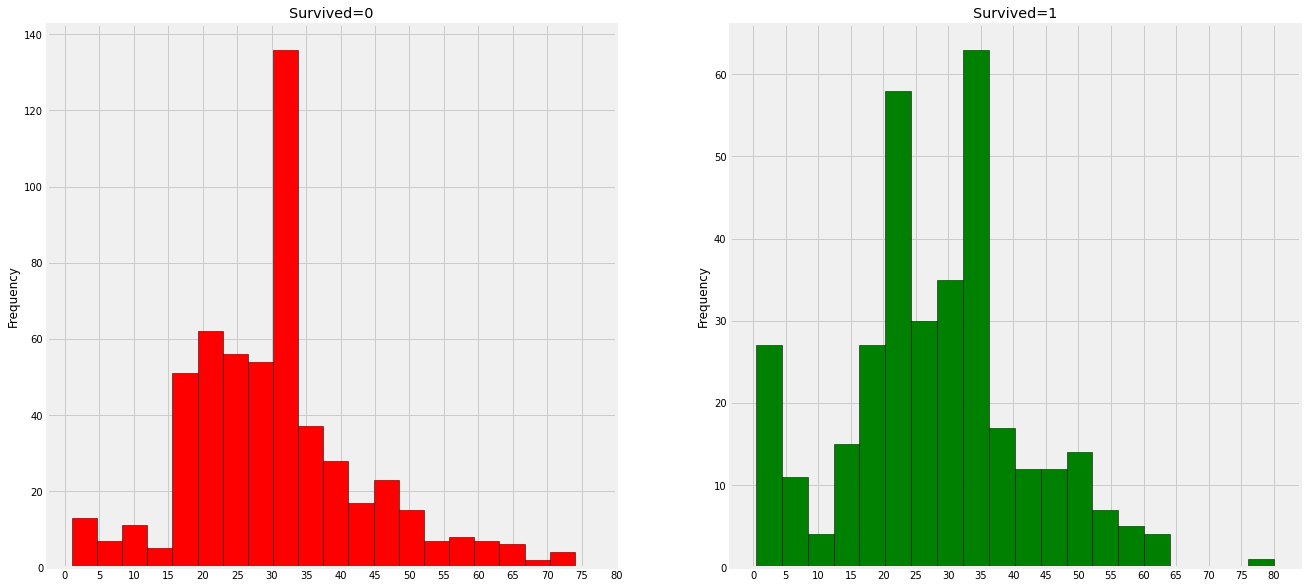

In [20]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- The toddlers(age<5) were saved in large numbers(The Womens and Child First Policy)
- The oldest Passengers was saved(80 years)
- ***Maximum number of deaths were in the age group of 30-40***

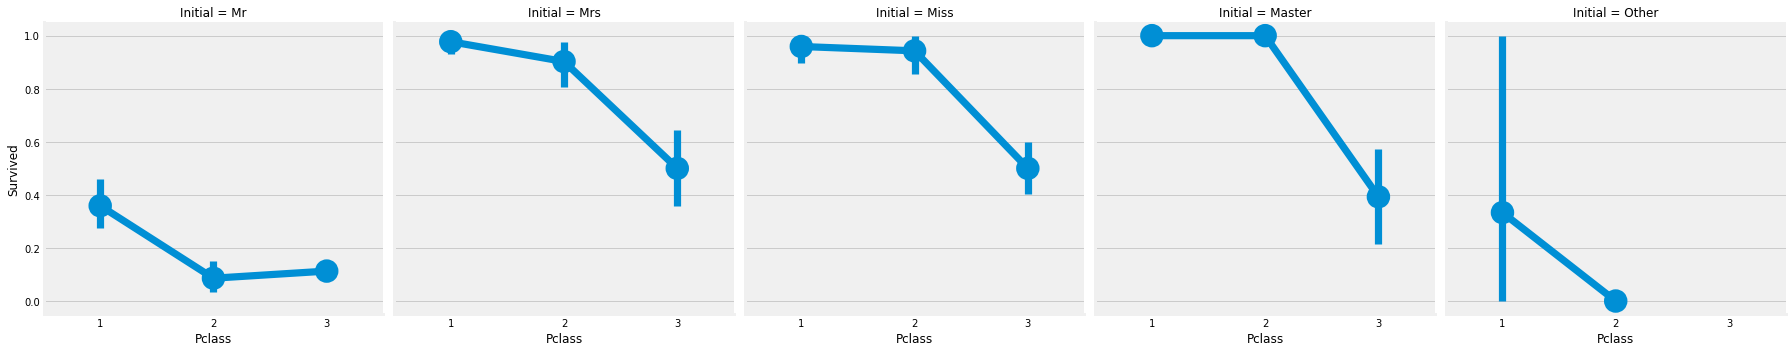

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

- The women and child first policy thus holds true irrespective of the class

**- Embarked -> Categorical value**

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

- Chances for Survival by Port of Embarkation

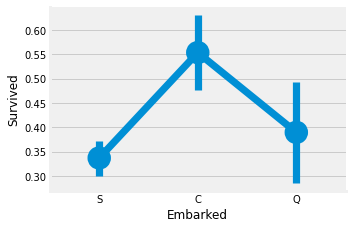

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- the chances for survival for port C is the highest around 0.55 while it is the lowest for S

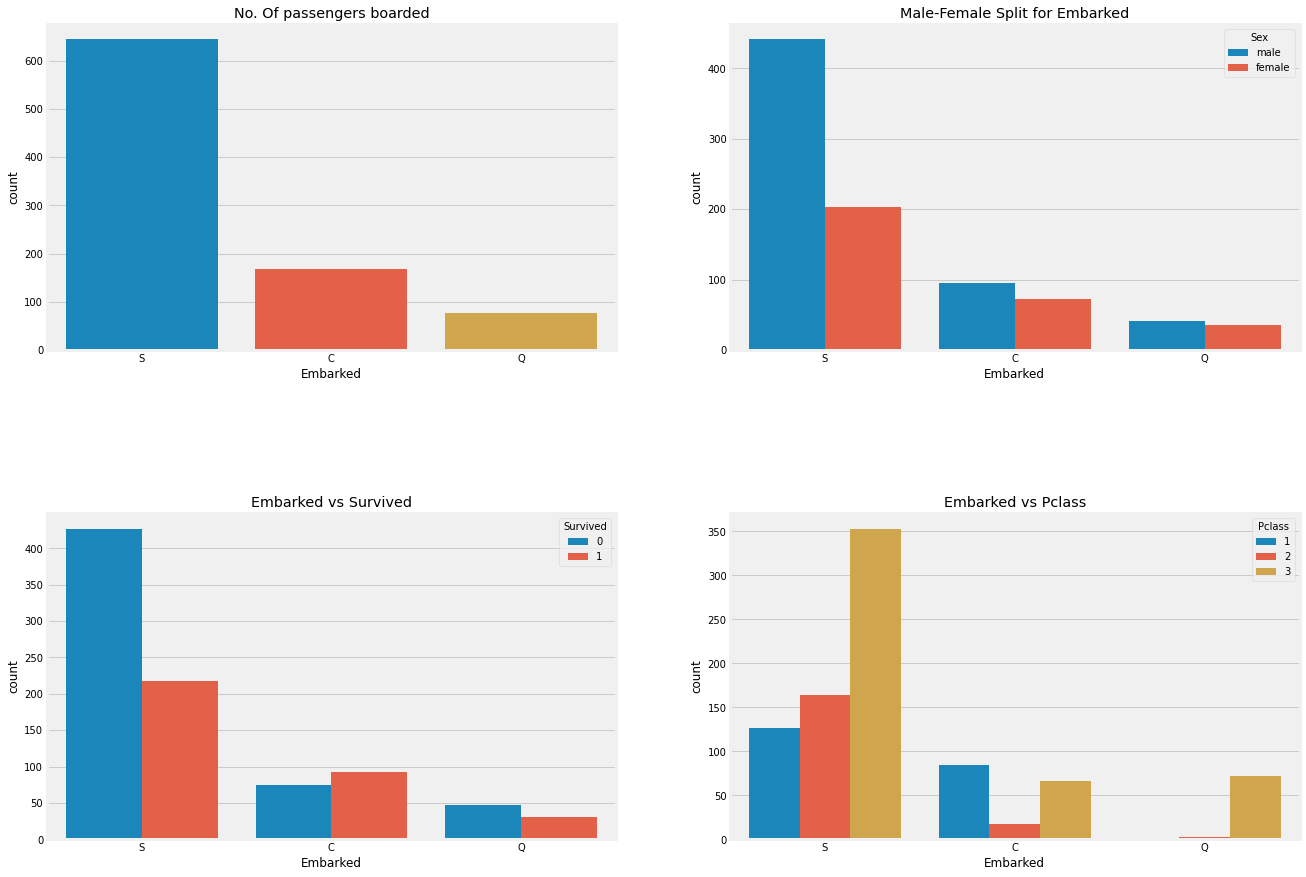

In [24]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of passengers boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- Maximum passengers boarded from S. Majority of them being from Pclass 3.
- The passengers from C look to be lucky as a good propotion of them survived. the reason for this maybe the rescue of all the Pclass1 and Pclass2 passengers.
- The embarked S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass 3 around 81% didn't survive.
- Port Q had almost 95% of the passengers were from Pclass3.

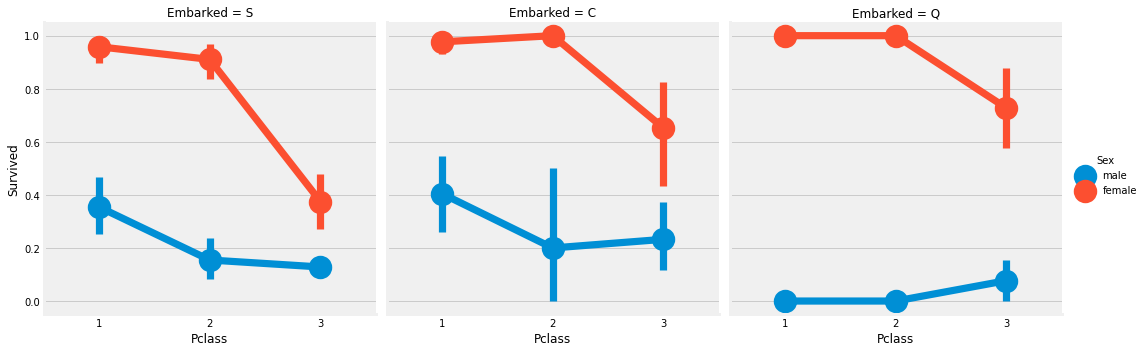

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

- The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.
- Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low(money matters)
- Port Q looks to be the unluckiest for Men, as almost all were from Pclass 3.

**- Filling Embarked NaN**

In [26]:
#As we saw that maximum passengers boarded from port S, we replaced NaN with S.
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any() #finally no NaN values

False

**- SibSip -> Discrete Feature**
- this feature represents whether a person is alone or with his family members.
- siblings = brother,sister,stepbrother,stepsister
- spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


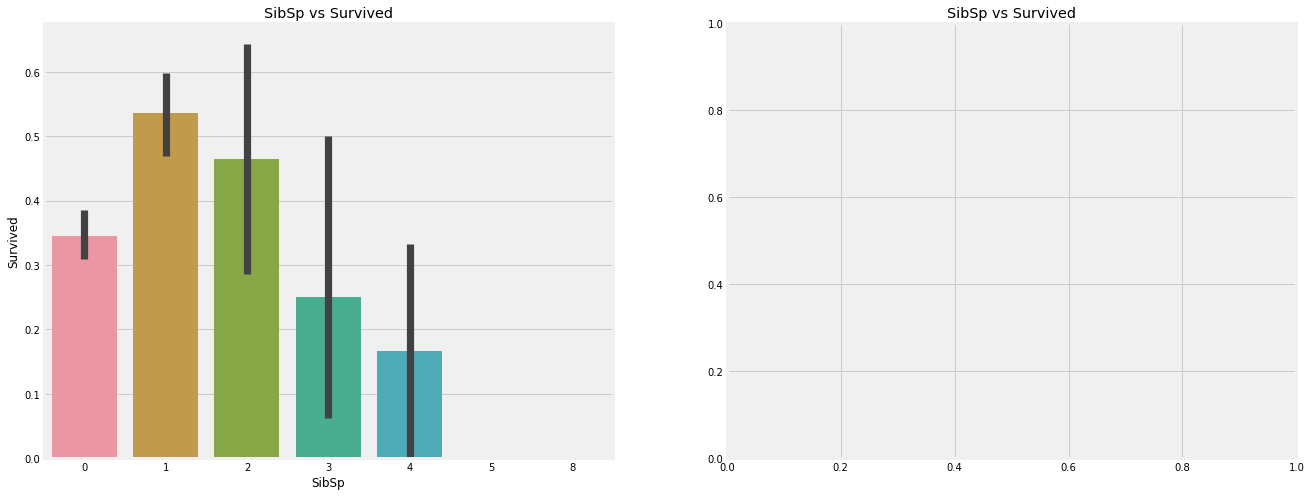

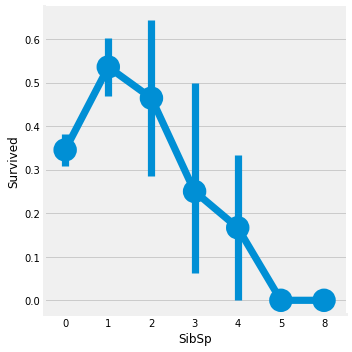

In [29]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2) ##############
plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- The barplot and factorplot show that if a passenger is alone onboard with no siblngs, he or she has 34.5% survival rate. The graph roughly decreases if the number of sibling increase. This make sense. That is, if i have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass?
- The reason is Pclass. The crosstab show that person with sibSip >3 were all in Pclass3. it is imminent that all the large families in pclass3(>3) died.

- **Parch**

In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- The crosstab shows that larger families were in Pclass3.

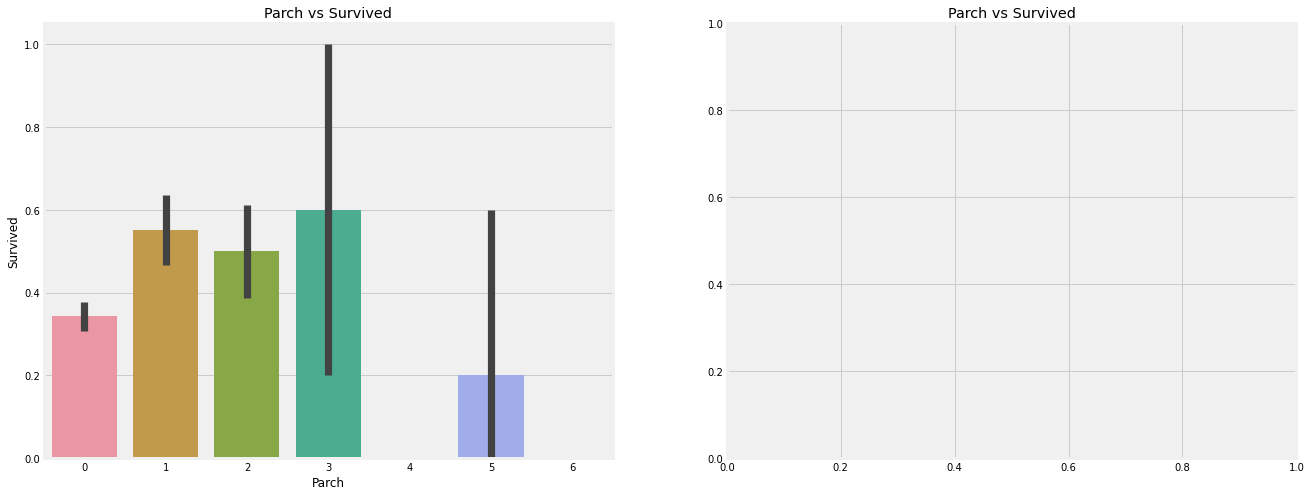

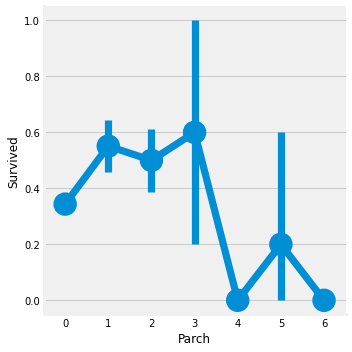

In [32]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
#plt.close(2)
plt.show()

- Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. it however reduces as the number goes up.
- the chances of survival is good for somebody who has 1~3 parents on the ship. being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

**- Fare -> Continous Feature**

In [33]:
print('The Highest Fare was:', data['Fare'].max())
print('The Lowest Fare was:', data['Fare'].min())
print('The Average Fare was:', data['Fare'].mean())

The Highest Fare was: 512.3292
The Lowest Fare was: 0.0
The Average Fare was: 32.204207968574636


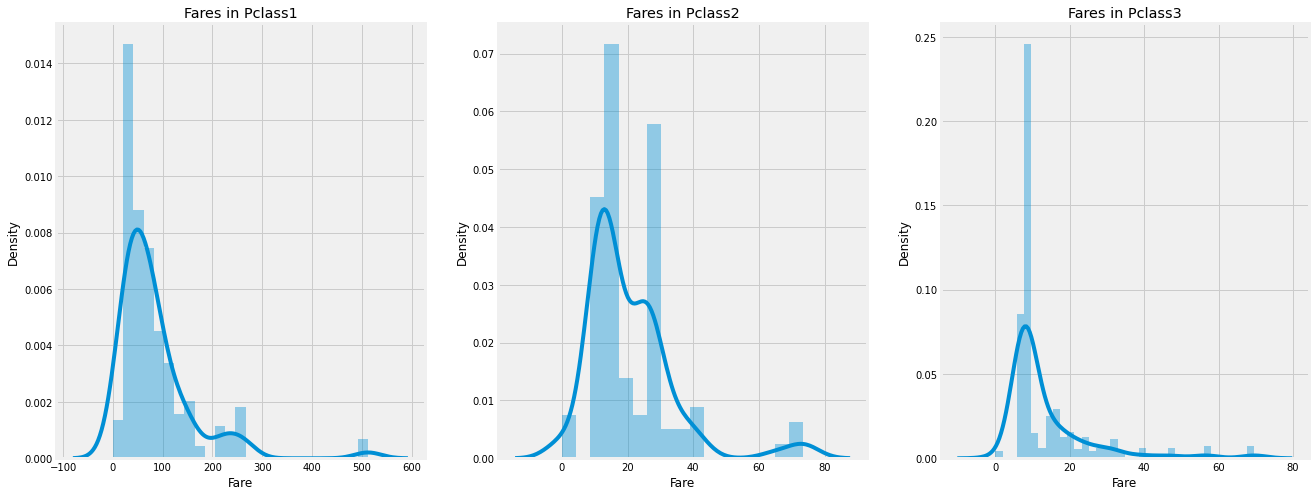

In [34]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass3')
plt.show()

- there looks to be a large distribution in the fares of passengers in pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

**-Observations in a nutshell for all features:**
- Sex: the chance of survival for women is high as compared to men
- Pclass: There is a visible trend that being a 1st class passenger gives you better chance of survival. the survival rate for pclass3 is very low. for women, the chance of survival from pclass2 is almost 1 and is high too for those from pclass2.
- Age: children less than 5-10 years do have a high chance of survival. passengers between age group 15-35 died a lot.
- Embarked: This is a very interesting feature. ***the chance of survival at C looks to be better than even though the majority of pclass1 passengers got up at S.*** passengers at Q were all from pclass3.
- Parch+SibSp: Having 1-2 siblings, spouse on board or 1-3 parents shows a greater chance of probability rather than being alone or having a large familiy traveling with you.

**-Correlation Between the Features**

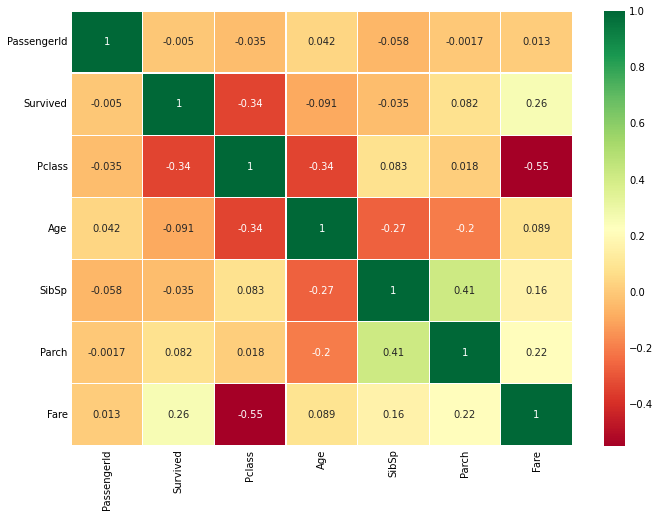

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr() -> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**-Interpreting the Heatmap**
- the first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see. what exactly correlation is.
- positive correlation: if an increase in feature A leads to increase in feature B, then they are positively correalted. a value 1 means perfect positive correaltion.
- negative correlation: if an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correaltion.
- Now let's say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.
- So do you think we should use both of them as o**ne of them is redundant**. while making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.
- Now from the above heatmap, we can see that the features are not much correalated. the highest correlation is between SibSp and Parch i.e.0.41. So we can carry on with all features.
- ***Pclass and Fare?***

### Part2: Feature Engineering and Data cleaning
- What is Feature Engineering?
  - whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.
  - An example would be getting the initials feature using Name feature. let's see if se can get any new features and eliminate a few. also we will transform the existing relevant features to suitable form for Predictive Modeling.

#### Age_band
- problem with age feature:
  - as I have mentioned earlier that Age is a continous feature, there is a problem with Continous variables in Machine Learning Models.
  - E.g.: If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.
  - now if I say to group them by their Age, then how would you do it? if there are 30 persons, there may be 30 age values. Now this is problematic.
  - We need to convert these continous values into categorical values by either Binning or Normalization. I will be using binning i.e.group a range of ages into a single bin or assign them a single value.
  - okay so the maximum age of a passenger was 80. so let's divide the range from 0-80 into 5 bins. so 80/5=16. so bins of size 16.

In [36]:
data['Age_band'] = 0
data.loc[data['Age']<=16,'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band'] = 3
data.loc[data['Age']>64,'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r') #checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


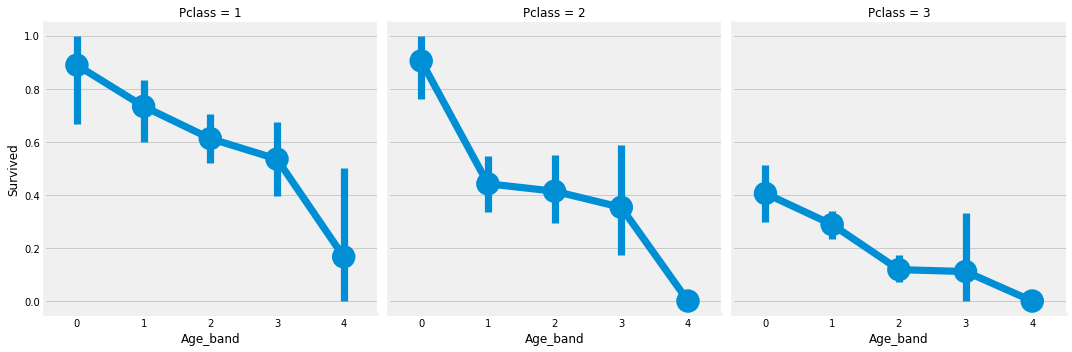

In [38]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

- the survival rate decreases as the age increases irrespective of the pclass

#### Family_size and Alone
- at this point, we can create a new feature called "Family_size" and "Alone" and analyse it. this feature is the summation of parch and sibsp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. alone will denote whether a passenger is alone or not.

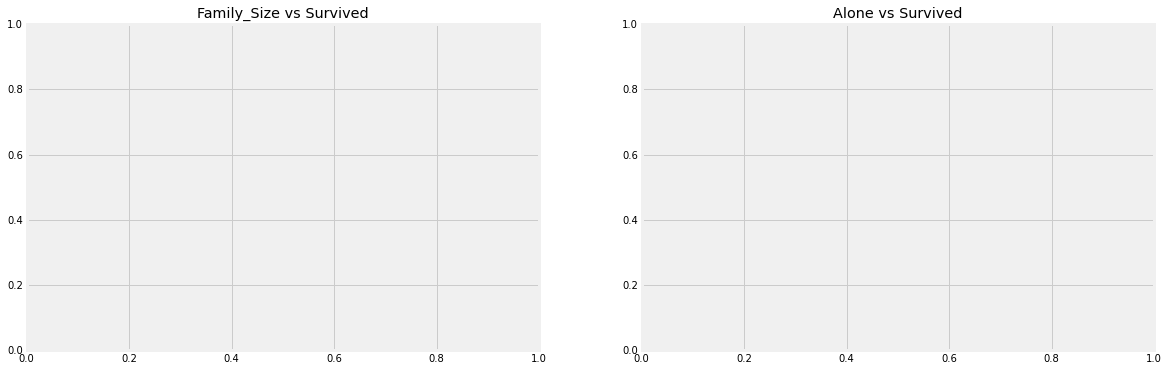

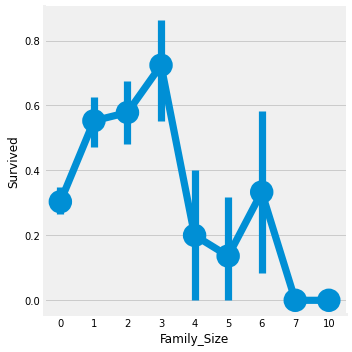

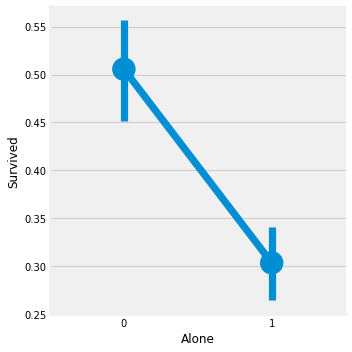

In [39]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] #family size
data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone'] = 1 #Alone

f, ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
#plt.close(2)
#plt.close(3)
plt.show()

- Family_Size=0 means that the passenger is alone. Clearly, if you are alone or family_size=0, then chances for survival is very low. For family size>4, the chances decrease too. This also looks to be an important feature for the model.

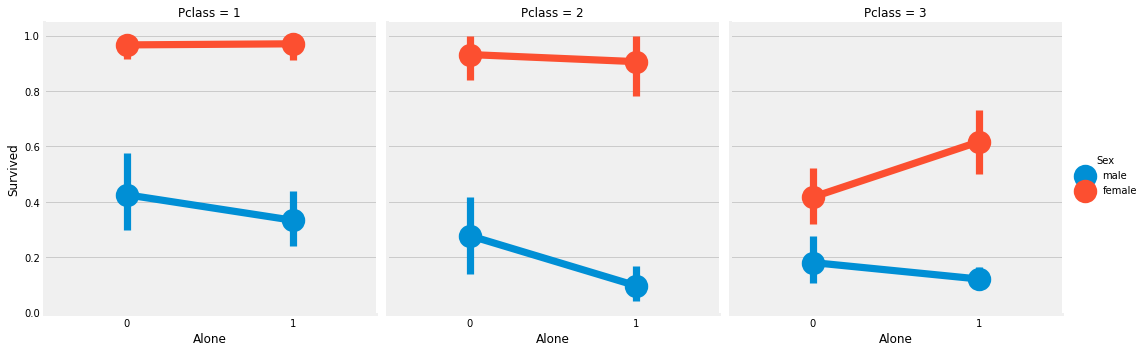

In [40]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

- It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

#### Fare_Range
- Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.
- so what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [41]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.
- Now we cannot pass the fare_range values as it is. we should convert it into singleton values same as we did in Age_Band

In [42]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] = 3

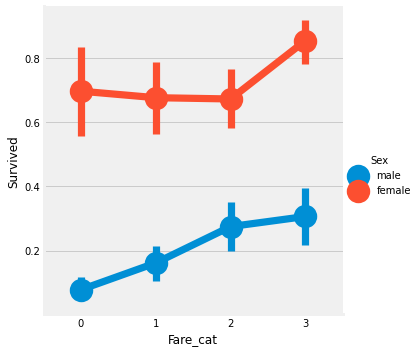

In [43]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

- clearly, as the Fare_cat increases, the survival chances increases. this feature may become an important feature during modeling with the Sex.

#### Converting String values into Numeric
- since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### Dropping UnNeeded Features
- Name -> we don't need name features as it cannot be converted into any categorical value
- Age -> We have Age_band feature, so no need of this
- Ticket -> it is any random string that cannot be categorised.
- Fare -> We have the Fare_cat feature, so unneeded.
- Cabin -> a lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.
- Fare_Range -> we have the fare_cat feature.
- PassengerID -> cannot be categorised.

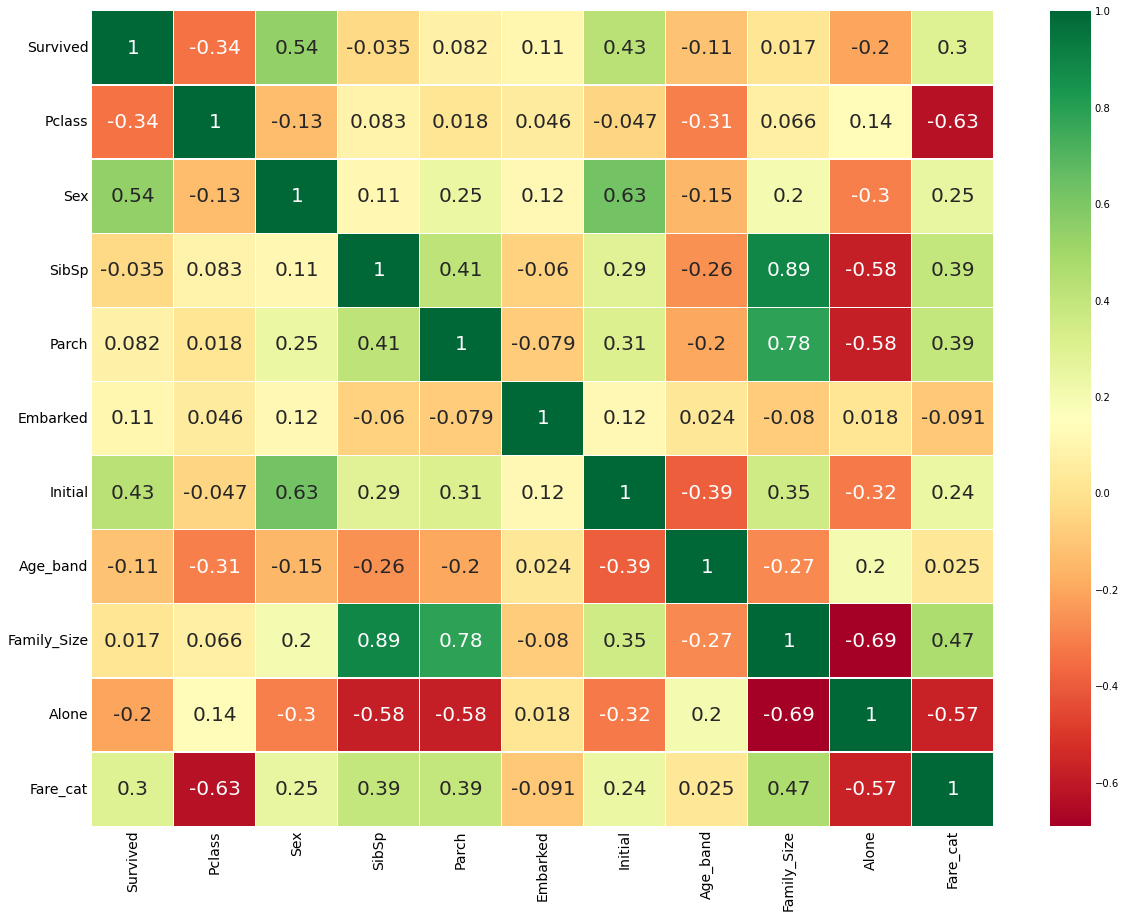

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
#data.drop(['Fare_cut'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Now the above correlation plot, we can see some positively related features. some of them being SibSp & Family_size and parch & Family_size and some negative ones like Alone & Family_size

### Part3: Predictive Modeling
- we have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. so now we will predict the whether the passenger will survive or not using some great classification algorithms. following are the algorithms i will use to make the model:
  - Logistic Regression
  - Support Vector Machines(Linear and radial)
  - Random Forest
  - K-Nearest Neighbours
  - Naive Bayes
  - Decision Tree

In [46]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector machine
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #naive bayes
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.model_selection import train_test_split #training and testing data split
#-> testing data가 실제로는 validation data??
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [47]:
train,test = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
y = data['Survived']

#### Radial Support Vector Machines(rbf-SVM)

In [48]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print("Accuracy for rbf SVM is ",metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [50]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print("Accuracy for linear SVM is ",metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is  0.8171641791044776


#### Logistic Regression

In [55]:
###예시랑 결과 다름
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print("The Accuracy of the Logistic Regression is ",metrics.accuracy_score(prediction3,test_Y))

The Accuracy of the Logistic Regression is  0.8134328358208955


#### Decision Tree

In [56]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print("The Accuracy of the Decision Tree is ",metrics.accuracy_score(prediction4,test_Y))

The Accuracy of the Decision Tree is  0.7985074626865671


#### K-Nearest Neighbours(KNN)

In [59]:
#엥 이것도 다른데
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print("The Accuracy of the KNN is ",metrics.accuracy_score(prediction5,test_Y))

The Accuracy of the KNN is  0.8134328358208955


***- Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Let's check the accuracies over various values of n_neighbours.***

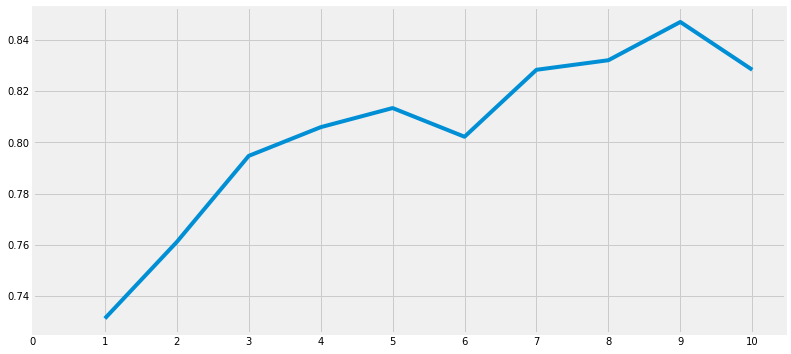

Accuracies for different values of n are:  [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [61]:
#그래프가 왜 다르지
a_index = list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
  prediction = model.predict(test_X)
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are: ', a.values,'with the max value as ',a.values.max())

#### Gaussian Naive Bayes

In [62]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print("The Accuracy of the NaiveBayes is ",metrics.accuracy_score(prediction6,test_Y))

The Accuracy of the NaiveBayes is  0.8134328358208955


#### Random Forests

In [63]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print("The Accuracy of the Random Forests is ",metrics.accuracy_score(prediction7,test_Y))

The Accuracy of the Random Forests is  0.8171641791044776


- The accuracy of a model is not the only factor that determines the robustness of the classifier. let's say that a classifier is trained over a training data and tested over the test data and it score an accuracy of 90%.
- Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over? the answer is No, because we cannot determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is know as **model variance**.
- to overcome this and get a generalized model, we use cross validation.

#### Cross Validation
- Many a times, the data is imbalanced, i.e. there may be a high 